In [1]:
import datajoint as dj
import numpy as np
import time

import pandas as pd
import seaborn as sns
sns.set() #sets the asethetics parameters in what set

In [11]:
#setting the address and the username
dj.config['database.host'] = '10.28.0.34'
dj.config['database.user'] = 'celiib'
dj.config['database.password'] = 'newceliipass'
dj.config['safemode']=True
dj.config["display.limit"] = 20

schema = dj.schema('microns_pinky')
pinky = dj.create_virtual_module('pinky', 'microns_pinky')


In [12]:
#pinky.NeuriteTarget()

In [13]:
"""
Need to find where the table was created
grep -iRl "NeuriteTargetsRevised" ./

"""

'\nNeed to find where the table was created\ngrep -iRl "NeuriteTargetsRevised" ./\n\n'

In [14]:
#creates the table with spine data without the spine label
#how to filter out the spine proportion

#have to first remove the ones that have only spine synapses


neurite_targets_no_spine = (pinky.NeuriteTargetsRevised() & "spine_num<total").proj(spine_head_prop="spine_head_prop/(1-spine_prop)",
                                                         spine_neck_prop="spine_neck_prop/(1-spine_prop)",
                                                         shaft_prop="shaft_prop/(1-spine_prop)",
                                                         non_spine_prop="non_spine_prop/(1-spine_prop)",
                                                         total="total-spine_num")



In [15]:
#different lengths based on the number of synapses threshold

print(len(neurite_targets_no_spine))
print(len(neurite_targets_no_spine & "total>12"))
print(len(neurite_targets_no_spine & "total>10")) 
print(len(neurite_targets_no_spine & "total>8")) 
print(len(neurite_targets_no_spine & "total>6")) 

30088
1666
2912
5312
10102


In [16]:
neurite_targets_no_spine_6 = (neurite_targets_no_spine & "total>6")
neurite_targets_no_spine_6

segmentation segmentation id,segment_id segment id unique within each Segmentation,spine_head_prop calculated attribute,spine_neck_prop calculated attribute,shaft_prop calculated attribute,non_spine_prop calculated attribute,total calculated attribute
3,648518346341351514,0.6666666942614097,0.11111111295076065,0.2222222259015213,0.0,9.0
3,648518346341351518,0.8571428656578064,0.1428571492433548,0.0,0.0,7.0
3,648518346341351525,0.75,0.0833333358168602,0.1666666716337204,0.0,12.0
3,648518346341351631,0.8181818127632141,0.09090909361839294,0.09090909361839294,0.0,22.0
3,648518346341351695,0.6666666865348816,0.2222222238779068,0.1111111119389534,0.0,9.0
3,648518346341351719,0.8571428571428571,0.0,0.14285714285714285,0.0,7.0
3,648518346341351767,0.7777777658200559,0.11111111295076065,0.11111111295076065,0.0,9.0
3,648518346341351896,0.8181818127632141,0.09090909361839294,0.09090909361839294,0.0,11.0
3,648518346341351904,0.0,0.1428571492433548,0.8571428656578064,0.0,7.0
3,648518346341351978,0.8749999883584678,0.0,0.12500000232830644,0.0,8.0


In [17]:
#get the portions of groups first
head_group = neurite_targets_no_spine_6 & "spine_head_prop>0.6"
head_group

segmentation segmentation id,segment_id segment id unique within each Segmentation,spine_head_prop calculated attribute,spine_neck_prop calculated attribute,shaft_prop calculated attribute,non_spine_prop calculated attribute,total calculated attribute
3,648518346341351514,0.6666666942614097,0.11111111295076065,0.2222222259015213,0.0,9.0
3,648518346341351518,0.8571428656578064,0.1428571492433548,0.0,0.0,7.0
3,648518346341351525,0.75,0.0833333358168602,0.1666666716337204,0.0,12.0
3,648518346341351631,0.8181818127632141,0.09090909361839294,0.09090909361839294,0.0,22.0
3,648518346341351695,0.6666666865348816,0.2222222238779068,0.1111111119389534,0.0,9.0
3,648518346341351719,0.8571428571428571,0.0,0.14285714285714285,0.0,7.0
3,648518346341351767,0.7777777658200559,0.11111111295076065,0.11111111295076065,0.0,9.0
3,648518346341351896,0.8181818127632141,0.09090909361839294,0.09090909361839294,0.0,11.0
3,648518346341351978,0.8749999883584678,0.0,0.12500000232830644,0.0,8.0
3,648518346341351998,0.7692307902158365,0.0,0.23076923385527007,0.0,13.0


In [18]:
#get the portions of groups first
shaft_group = neurite_targets_no_spine_6 & "spine_head_prop<=0.6" & "shaft_prop>=0.5"
shaft_group

segmentation segmentation id,segment_id segment id unique within each Segmentation,spine_head_prop calculated attribute,spine_neck_prop calculated attribute,shaft_prop calculated attribute,non_spine_prop calculated attribute,total calculated attribute
3,648518346341351904,0.0,0.1428571492433548,0.8571428656578064,0.0,7.0
3,648518346341352081,0.4000000131130219,0.10000000327825548,0.5000000163912773,0.0,10.0
3,648518346341352306,0.1428571492433548,0.0,0.8571428656578064,0.0,7.0
3,648518346341352417,0.25,0.125,0.625,0.0,8.0
3,648518346341352553,0.18181818772938627,0.0,0.8181818203985198,0.0,11.0
3,648518346341352671,0.1428571492433548,0.1428571492433548,0.7142857313156128,0.0,7.0
3,648518346341352679,0.14285714422561685,0.2857142884512337,0.5714285769024674,0.0,7.0
3,648518346341352789,0.1818181872367859,0.0,0.8181818127632141,0.0,11.0
3,648518346341352790,0.20000000298023224,0.30000001192092896,0.5,0.0,10.0
3,648518346341353247,0.10714285287112758,0.10714285287112758,0.7857142749660629,0.0,28.0


In [19]:
unused = (neurite_targets_no_spine_6 - shaft_group.proj()) - head_group.proj()
unused

segmentation segmentation id,segment_id segment id unique within each Segmentation,spine_head_prop calculated attribute,spine_neck_prop calculated attribute,shaft_prop calculated attribute,non_spine_prop calculated attribute,total calculated attribute
3,648518346341352071,0.5714285714285714,0.14285714285714285,0.2857142857142857,0.0,7.0
3,648518346341352126,0.375,0.5,0.125,0.0,8.0
3,648518346341352411,0.5000000086923441,0.3333333507180215,0.16666667535901075,0.0,12.0
3,648518346341352546,0.5714285969734192,0.0,0.4285714328289032,0.0,7.0
3,648518346341352582,0.5555555820465088,0.0,0.4444444477558136,0.0,9.0
3,648518346341353249,0.5,0.125,0.375,0.0,8.0
3,648518346341353845,0.5555555820465088,0.1111111119389534,0.3333333432674408,0.0,9.0
3,648518346341353846,0.5,0.21428571656650425,0.28571429939902554,0.0,14.0
3,648518346341354183,0.4444444477558136,0.3333333432674408,0.2222222238779068,0.0,9.0
3,648518346341354568,0.4285714328289032,0.1428571492433548,0.4285714328289032,0.0,7.0


In [20]:
#check that the lengths are the same
print(len(neurite_targets_no_spine_6))
print(len(shaft_group) + len(head_group) + len(unused))

10102
10102


In [21]:

#pull down the head data and sort
head_data = head_group.fetch(as_dict=True)

head_df = pd.DataFrame(head_data)
head_df_base = head_df.drop(columns=['segmentation', 'segment_id',"total","non_spine_prop","spine_neck_prop"])

spine_df_base_head_shaft_sort = head_df_base.sort_values(['spine_head_prop','shaft_prop'], ascending=[False,True])
spine_df_base_head_shaft_sort



,spine_head_prop,shaft_prop
1714,1.0,0.0
5322,1.0,0.0
5538,1.0,0.0
5928,1.0,0.0
131,1.0,0.0
413,1.0,0.0
818,1.0,0.0
1067,1.0,0.0
1483,1.0,0.0
1696,1.0,0.0


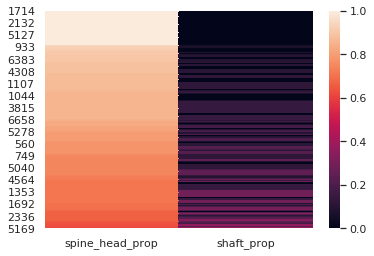

In [22]:
#heat map of spine heads
spine_head_shaft_sort = sns.heatmap(spine_df_base_head_shaft_sort)

In [23]:

#pull down the head data and sort
shaft_data = shaft_group.fetch(as_dict=True)

shaft_df = pd.DataFrame(shaft_data)
shaft_df_base = shaft_df.drop(columns=['segmentation', 'segment_id',"total","non_spine_prop","spine_neck_prop"])

shaft_df_base_head_shaft_sort = shaft_df_base.sort_values(['shaft_prop','spine_head_prop'], ascending=[True,False])
#shaft_df_base_head_shaft_sort



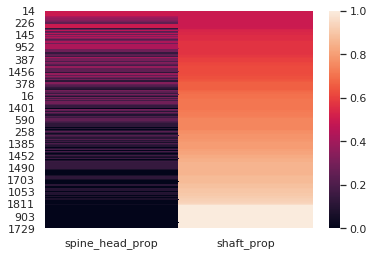

In [24]:
sns.heatmap(shaft_df_base_head_shaft_sort)

In [25]:

#pull down the head data and sort
unused_data = unused.fetch(as_dict=True)

unused_df = pd.DataFrame(unused_data)
unused_df_base = unused_df.drop(columns=['segmentation', 'segment_id',"total","non_spine_prop","spine_neck_prop"])

unused_df_base_head_shaft_sort = unused_df_base.sort_values(['shaft_prop','spine_head_prop'], ascending=[True,False])
unused_df_base_head_shaft_sort



,spine_head_prop,shaft_prop
118,0.571429,0.000000
119,0.571429,0.000000
260,0.571429,0.000000
266,0.571429,0.000000
468,0.571429,0.000000
736,0.571429,0.000000
777,0.571429,0.000000
850,0.571429,0.000000
876,0.571429,0.000000
957,0.571429,0.000000


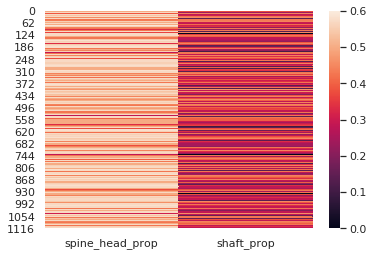

In [26]:
sns.heatmap(unused_df_base)

In [27]:
#### CAN'T END UP DOING NANS!
# nans = pd.DataFrame([dict(spine_head_prop=np.nan,shaft_prop=np.nan)]*100)
# sns.heatmap(nans)

In [28]:
# total = spine_df_base_head_shaft_sort +  shaft_df_base_head_shaft_sort + unused_df_base_head_shaft_sort



# total = pd.concat(spine_df_base_head_shaft_sort,
#           unused_df_base_head_shaft_sort,
#          shaft_df_base_head_shaft_sort)

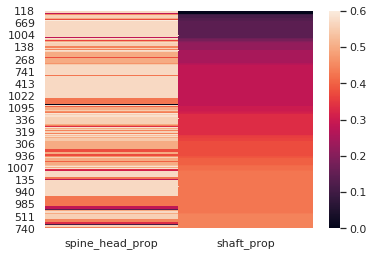

In [29]:
sns.heatmap(unused_df_base_head_shaft_sort)

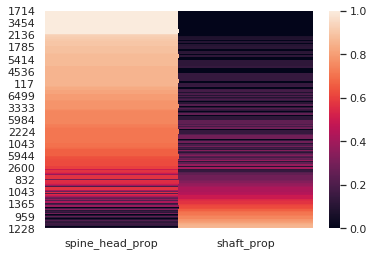

In [30]:
sns.heatmap(pd.concat([spine_df_base_head_shaft_sort,
          unused_df_base_head_shaft_sort,
         shaft_df_base_head_shaft_sort]))